<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl, seaborn as sns
from ipywidgets import interactive
%matplotlib inline

In [2]:
sns.set_context('poster')

We use the following equations to determine salary raises.

Assume an annual raise of $r$ (ex: 3% raise $\rightarrow r = 0.03$)

For an initial salary of $S_0$, the base salary after $T$ years is:

$$S_T(r) = S_0 (1 + r)^T$$

This is, of course, ignoring potential union dues. If dues are some fraction $d$ of annual salary (ex: UAW nominal rates are 1.44% $\rightarrow d = 0.0144$), then the after-dues salary is:

$$S_T(r, d) =  S_0 (1 + r)^T(1-d)$$

For simplicity, we will normalize by base salary (which varies by department or position). The overall fractional raise $R$ after $T$ years is:

$$R_T(r,d) = (1 + r)^T(1-d) - 1$$

In [3]:
def salary_raise(t, r, d):
    return 100. * (((1. + r)**t * (1.0 - d)) - 1.)

Notably, the raise scales exponentially with time as $(1+r)^T$, while only scaling linearly with $(1-d)$. Let us assume a nominal "without union" case of a 3% annual raise $(r=0.03, d=0)$, and compare to a case where the union (charging 1.44% dues) only is successful in negotiating a 3.5% annual raise $(r=0.035, d=0.0144)$. It would be incorrect to assume that the union-negotiated raise will be worse than the nominal case! __After 2 years__, the union-negotiated raises would surpass those of the nominal 3% case.

In [4]:
def plot_union(r, d):
    t = np.arange(0,8)
    plt.figure(figsize=(12, 6))
    y1 = salary_raise(t+1, 0.03, 0.)
    y2 = salary_raise(t+1, r, d)
    plt.step(t, y2, 'ro-', label='{:.2f}% annual - {:.2f}% dues'.format(100.*r, 100.*d), where='post')
    plt.step(t, y1, 'k-', label='3.00% annual', where='post')
    improves = np.where(y2 > y1)[0]
    if len(improves) >= 1:
        parity_year = t[improves[0]]
        plt.title('Union Improves Wages after {:d} year(s)'.format(parity_year))
        plt.axvline(x=parity_year, ls=':', color='k')
    else:
        plt.title('Union Never Improves Wages (relative to 3% fixed)')
    plt.xlabel('Years'), plt.ylabel('Wage Increase (%)')
    plt.legend(loc=0)

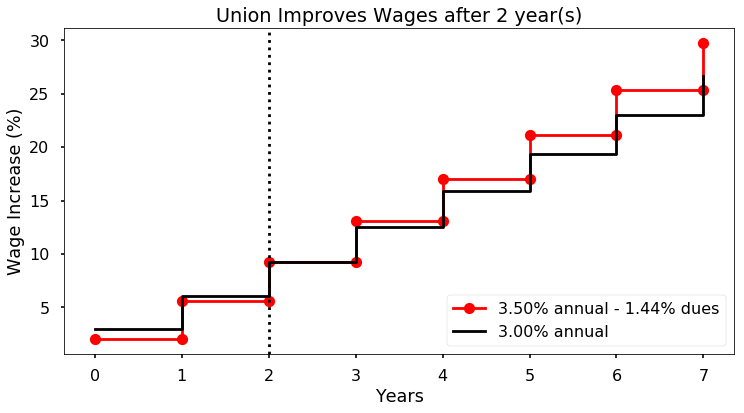

In [5]:
plot_union(0.035, 0.0144)

Below is an interactive visualization, where you can vary the union-negotiated raise rate ($r$) and the union dues ($d$) and compare to a nominal 3% annual raise

In [6]:
interactive_plot = interactive(plot_union, r=(0., 0.1, 0.001), d=(0., 0.05, 0.001))
interactive_plot.kwargs_widgets[0].value = 0.035
interactive_plot.kwargs_widgets[0].readout_format = '.3f'
interactive_plot.kwargs_widgets[1].value = 0.0144
interactive_plot.kwargs_widgets[1].readout_format = '.3f'
interactive_plot

interactive(children=(FloatSlider(value=0.035, description='r', max=0.1, readout_format='.3f', step=0.001), FloatSlider(value=0.0144, description='d', max=0.05, readout_format='.3f', step=0.001), Output()), _dom_classes=('widget-interact',))